## 분류의 개요
- 지도학습 : 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝
- 학습 데이터로 피처와 레이블값(결정 값, 클래스 값)을 ML 알고리즘으로 학습해 모델 생성 후 새로운 값이 주어졌을 때 미지의 레이블 값 예측
1. 베이즈 통계와 생성 모델에 기반한 **나이브 베이즈**
2. 독립/종속 변수의 선형 관계성에 기반한 **로지스틱 회귀**
3. 데이터 균일도에 따른 **규칙 기반의 결정 트리**
4. 개별 클래스 간의 최대분류 마진을 효과적으로 찾아주는 **SVM**
5. 근접 거리를 기준으로 하는 **최소 근접 알고리즘**
6. 심층 연결 기반의 **신경망**
7. 서로 다른(혹은 같은) ML 알고리즘을 결합한 **앙상블**

### 앙상블 기법
- 정형 데이터의 예측 분석 영역에서 높은 예측 성능을 보임
- **배깅/부스팅**이 대표적이고 서로 다른 알고리즘을 단순결합하기도 함.
- 배깅) 랜덤 포레스트는 배깅 방식 중 하나로, 결정 트리를 기본 알고리즘으로 사용함.
- 부스팅) 그래디언트 부스팅, XgBoost, LightGBM, 스태킹 등

**결정 트리**
- 앙상블 모형에서 주로 사용하는 알고리즘
- 쉽고 유연하며 스케일링이나 정규화 등 사전 가공의 영향이 적음
- 과적합되어 예측 성능이 저하될 위험이 있지만 앙상블에서는 오히려 장점으로 작용함
- 여러 개의 약한 학습기를 결합하여 확률적으로 보완하고 오류에 대한 가중치를 지속적으로 업데이트하며 예측 성능을 향상할 수 있음

## 결정 트리
- 규칙 노드 / 리프 노드
- 많은 규칙이 있을 수록 복잡해지고 이로 인한 과적합 발생 위험이 있음
- 분류 시 최대한 많은 데이터 세트가 해당 분류에 속해야 높은 예측 정확도를 가질 수 있음.
- 데이터 세트의 균일도; 데이터 구분 시 필요한 정보량에 영향을 미침.
- 결정 노드; 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦.
- 정보 균일도 측정 방법 : **엔트로피를 이용한 정보 이득 지수**, **지니 계수**
  - 정보 이득 : 1-(엔트로피 지수)
  - 지니 계수 : 0이 가장 평등, 1에 가까워질수록 불평등

**결정 트리 모델의 특징**
- 균일도라는 룰을 기반으로 하고 있어 쉽고 직관적인 알고리즘.
- 시각화로 표현까지 가능하며 균일도에 초점을 맞췄으므로 전처리 작업이 필요 없음
- 그러나, 과적합으로 정확도 하락이라는 단점이 있음.
- 규칙 수가 증가할수록 복잡해져서 예측 성능이 떨어짐. 트리의 크기를 사전에 제한하는 튜닝이 필요함

**결정 트리 파라미터**
- 사이킷런의 DecisionTreeClassifier, DecisionTreeRegressor 클래스
- 사이킷런의 결정 트리 구현 : CART 알고리즘 기반 (분류, 회귀 모두 사용 가능)
- 파라미터
  - min_samples_split : 과적합 제어 파라미터. 디폴트 값은 2. 작게 설정할수록 분할 노드가 많아져서 과적합 가능성 증가.
  - min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수. 과적합 제어 가능
  - max_features : 최적의 분할을 위해 고려할 최대 피처 개수 (int, float, sqrt=auto, log=log2, None=전체 피처)
  - max_depths : 트리의 최대 높이. 디폴트는 None
  - max_leaf_nodes : 말단 노드의 개수 

**결정 트리 모델의 시각화**
- Graphviz 패키지 사용 
- 사이킷런의 트리 모듈은 Graphviz 를 사용하기 위해 export_graphviz() 함수 제공
- export_graphviz()는 Graphviz가 읽어 들여 그래프 형태로 시각화할 수 있는 출력 파일을 생성

- 리프 노드 : 더 이상 자식 노드가 없는 노드. 모든 데이터가 하나의 클래스로 결정되면 클래스가 결정된 리프 노드가 되고 지니 계수는 0이 됨.
- 브랜치 노드 : 자식 노드가 있는 노드로, 자식 노드를 만들기 위한 분할 규칙을 가짐
  ex) class=setosa라면 하위 노드를 가질 경우 setosa의 개수가 41개로 가장 많다는 의미를 가짐
- gini : 다음의 value=[]로 주어진 데이터 분포에서의 지니계수
- samples : 현 규칙에 해당하는 데이터 건수
- value = [] : 클래스 값 기반 데이터 건수.
  ex) value = [41,40,39] : 클래스 순서대로 41개, 40개, 39개를 가지고 있음.
- 규칙 생성 로직을 사전에 제어하지 않으면 과적합의 문제가 있음. 하이퍼 파라미터로 결정트리 알고리즘을 제어해야 함. **max_depth**, **min_samples_split**(자식 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수), **min_samples_leaf**(리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값)

### 결정 트리 과적합(Overfitting)
- 결정 트리 모델의 예측 성능은 아무런 제약 조건을 가지지 않은 결정 경계보다는 노드 생성 규칙을 완화한 트리가 더 뛰어날 가능성이 높음

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트
- 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처 수집 데이터

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# decisiontreeclassifier 설정
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz
# export_graphviz()의 호출 결과로 out_file 로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, \
               feature_names = iris_data.feature_names, impurity = True, filled = True) 

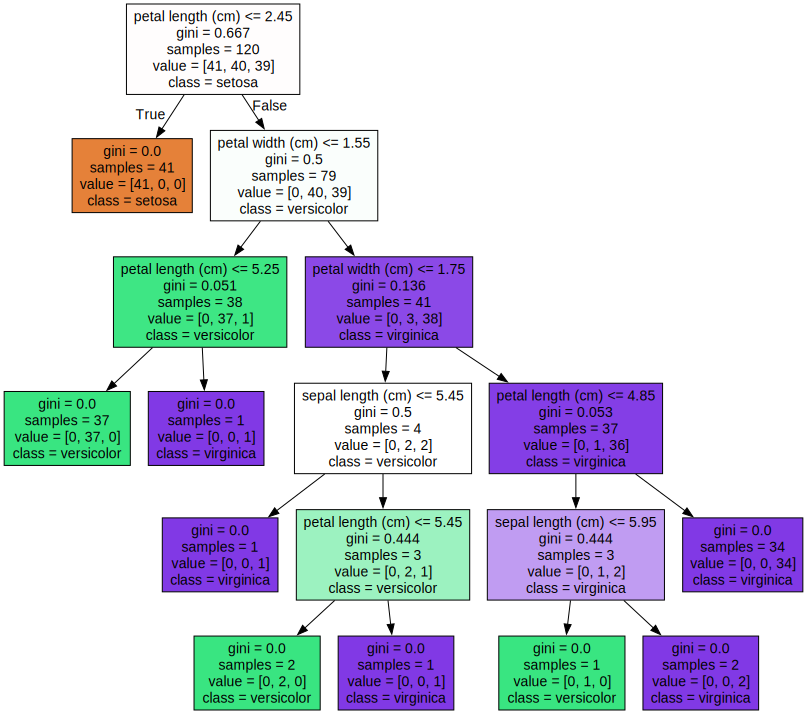

In [4]:
import graphviz
# 위에서 생성된 tree.dot 파일을 graphviz가 익어서 주피터 상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

feature importances :\[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

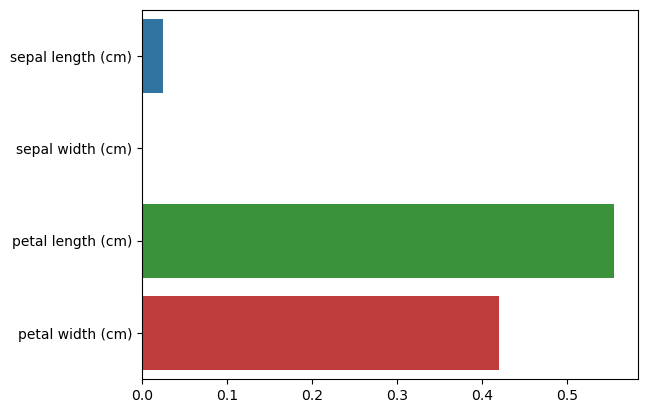

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline
# feature importance 추출
print('feature importances :\{0}'.format(np.round(dt_clf.feature_importances_, 3)))
# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_) :
    print('{0} : {1:.3f}'.format(name, value))
# feature별 importance를 column별로 시각화하기
sns.barplot(x = dt_clf.feature_importances_, y=iris_data.feature_names)

균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중욯ㄴ 요건임. 모델을 간결하고 이상치에 강한 모델을 만들 수 있음. **feature_importances_**로 피처의 중요도를 측정할 수 있음

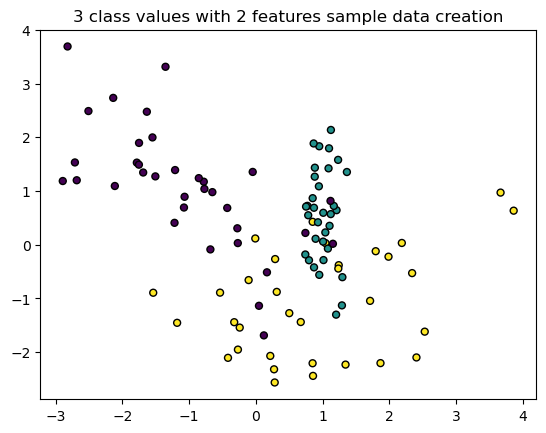

In [3]:
# 결정 트리 과적합
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 class values with 2 features sample data creation')

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_feature, y_labels=make_classification(n_features = 2, n_redundant = 0, 
                                       n_informative = 2, n_classes = 3,
                                       n_clusters_per_class = 1, random_state= 0)
# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스는 다른 색깔로 표시됨
plt.scatter(X_feature[:,0], X_feature[:,1], c=y_labels, s=25, edgecolor='k')

1. 결정 트리 생성에 별다른 제약이 없도록 하이퍼 파라미터가 디폴트인 Classifier를 학습 후 결정 기준 경계를 시각화

In [4]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\gyw78\AppData\Local\Temp\ipykernel_37988\3833059615.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


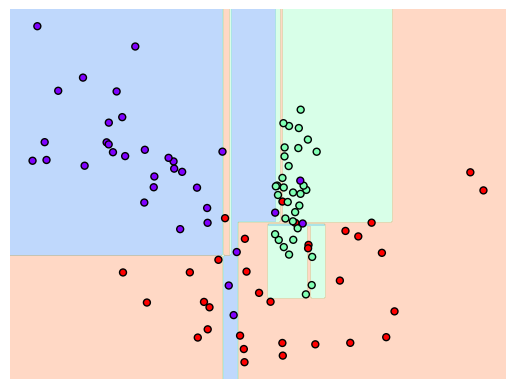

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_feature, y_labels)
visualize_boundary(dt_clf, X_feature, y_labels)

# 분할이 자주 일어나 결정 기준 경계가 매우 많음. 복잡한 모델은 다른 데이터를 예측 시 정확도 떨어짐

2. min_samples_leaf = 6을 설정해 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 노드 생성 규칙을 완화한 결정 기준 경계

C:\Users\gyw78\AppData\Local\Temp\ipykernel_37988\3833059615.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


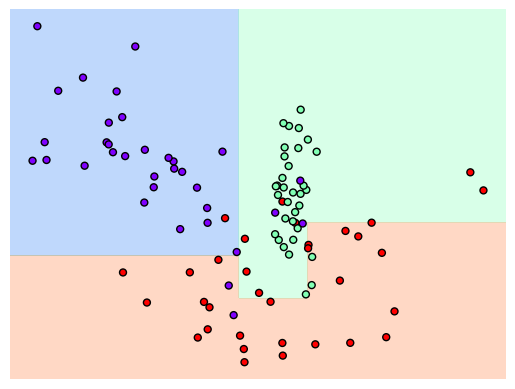

In [10]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_feature, y_labels)
visualize_boundary(dt_clf, X_feature, y_labels)

# 이상치에 크게 반응하지 않으면서 일반화된 분류 규칙에 따라 분류되었음.

In [14]:
# 사용자 행동 인식 데이터 세트
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. DF로 로드
feature_name_df = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/human+activity+recognition+using+smartphones/human_activity/human_activity/features.txt',
                             sep='\s+', header = None, names = ['column_index', 'column_name'])
# 피처명 인덱스를 제거하고 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출 : ', feature_name[:10])


전체 피처명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [17]:
# 중복된 피처명 확인
feature_dup_df=  feature_name_df.groupby(['column_name']).count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

# 총 42개의 피처명 중복

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [30]:
# 중복 데이터에 원본 피처명에 1 or 2를 부여해 새로운 피처명 부여
def get_new_feature_name_df(old_feature_name_df):
    #column_name으로 중복된 컬럼명에 대해서는 중복 차수 부여, col1, col1과 같이 2개의 중복 컬럼이 있을 경우 1, 2 
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [36]:
import pandas as pd
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/human+activity+recognition+using+smartphones/human_activity/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/human+activity+recognition+using+smartphones/human_activity/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/human+activity+recognition+using+smartphones/human_activity/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/human+activity+recognition+using+smartphones/human_activity/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/human+activity+recognition+using+smartphones/human_activity/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

C:\Users\gyw78\AppData\Local\Temp\ipykernel_37988\1017148101.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1] >0 else x[0] ,  axis=1)
C:\Users\gyw78\AppData\Local\Temp\ipykernel_37988\1017148101.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])


In [37]:
print('## 학습 피처 데이터셋 info')
print(X_train.info())

## 학습 피처 데이터셋 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [38]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random states 설정
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# DT_clf의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [ ]:
# 결정 트리의 트리 깊이가 예측 정확도에 주는 영향
# max_depth의 값을 계속 변화시키면서 예측 성능 확인

In [40]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6,8,10,12,16,20,14]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose=1)
grid_cv.fit(X_train, y_train)
print('gridsearchcv 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('gridsearchcv 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
gridsearchcv 최고 평균 정확도 수치 : 0.8513
gridsearchcv 최적 하이퍼 파라미터 :  {'max_depth': 16}


In [43]:
# gridsearchcf 객체의 cv_result 속성을 df로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,14,0.847808


In [44]:
max_depths = [6,8,10,12,16,20,14]
# max_depth 값을 변화시키면서 학습/테스트 세트에서의 예측 성능 측정
for depth in max_depths :
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 14 정확도 : 0.8571


In [45]:
# max_depth와 min_samples_split을 변경하며 정확도 성능 튜닝

In [47]:
params = {
    'max_depth' : [8,12,15,20], 'min_samples_split' : [16,24]
}
grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring= 'accuracy', cv=5, verbose =1)
grid_cv.fit(X_train, y_train)
print('gridsearchcv 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('gridsearchcv 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
gridsearchcv 최고 평균 정확도 수치 : 0.8549
gridsearchcv 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [48]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8717


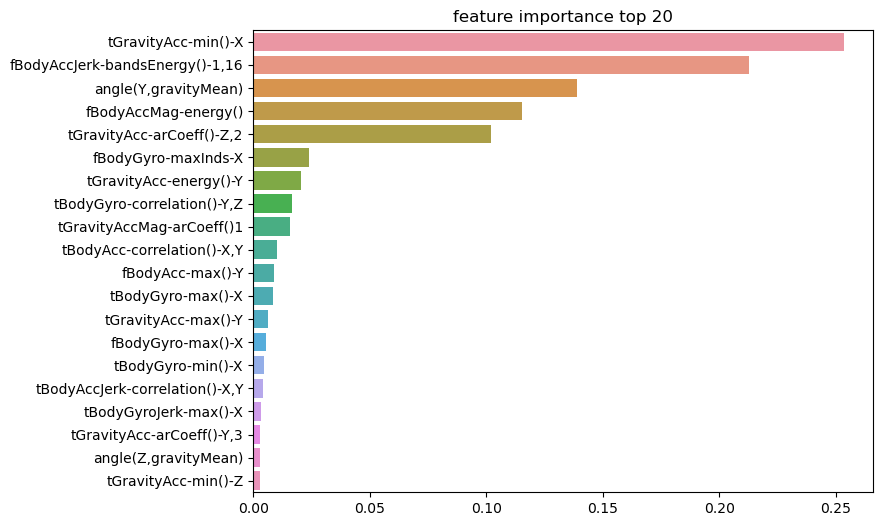

In [50]:
# 중요도가 높은 순으로 top 20 피처를 막대그래프로 표시
import seaborn as sns
ftr_importances_values = best_df_clf.feature_importances_
# top 중요도로 정렬을 쉽게 하고 시본 막대그래프로 쉽게 표현하기 위해 series 변환
ftr_importances = pd.Series(ftr_importances_values, index= X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6))
plt.title('feature importance top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()